# Decision Tree in Python with Record Data

### Introduction:

A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps you in decision making. It's visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret.

In [12]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import tree
from IPython.display import Image
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from numpy import transpose
import os


In [2]:
os.getcwd()

'/Users/raunakadvani/anly-501-project-raunakadvani2410/codes/decision_tree_py'

In [3]:
econ_df = pd.read_csv("../../data/clean-data/Fredapi_clean.csv")

In [4]:
econ_df

,Unnamed: 0,date,gdp_value,unemployment_value,fed_funds_value,recession
0,1,1990-01-01,5872.701,5.3,8.25,0
1,2,1990-04-01,5960.028,5.3,8.24,0
2,3,1990-07-01,6015.116,5.7,8.16,1
3,4,1990-10-01,6004.733,6.1,7.74,1
4,5,1991-01-01,6035.178,6.6,6.43,1
...,...,...,...,...,...,...
129,130,2022-04-01,25248.476,3.6,0.77,0
130,131,2022-07-01,25663.289,3.6,2.19,0
131,132,2022-07-01,25663.289,3.6,2.19,0
132,133,2022-07-01,26965.372,3.6,2.19,0


In [16]:
econ_df = econ_df.drop(['Unnamed: 0'], axis = 1)

In [27]:
#feature_cols = ['gdp_value','unemployment_value','fed_funds_value']
#X = econ_df[feature_cols]
#y = econ_df.recession

In [28]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [29]:
#clf = DecisionTreeClassifier()

#clf = clf.fit(X_train,y_train)

#y_pred = clf.predict(X_test)

In [30]:
#print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

(4, 4)


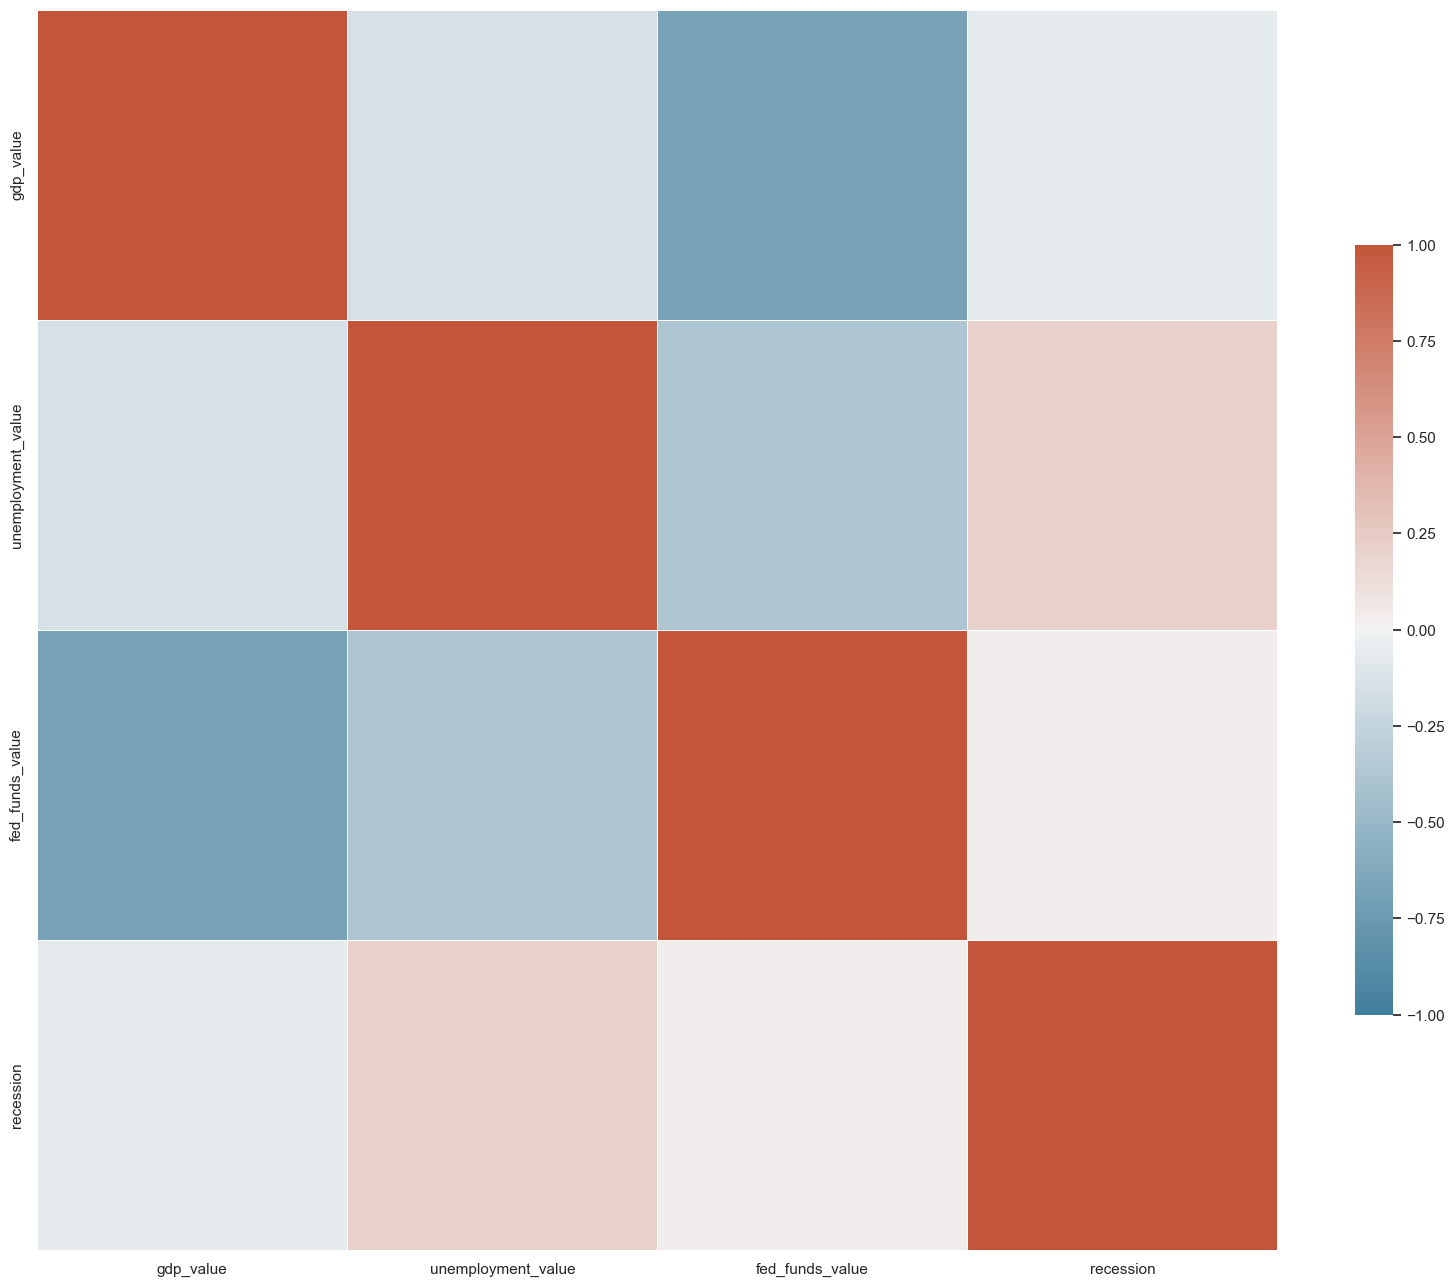

In [21]:
corr = econ_df.corr()
print(corr.shape)

sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(20, 20))  # Set up the matplotlib figure
cmap = sns.diverging_palette(230, 20, as_cmap=True) 	# Generate a custom diverging colormap
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  cmap=cmap, vmin=-1, vmax=1, center=0,
        square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show();

In [ ]:
from sklearn import tree

model = tree.DecisionTreeClassifier()
model = model.fit()

In [31]:
feature_cols = ['gdp_value','unemployment_value','fed_funds_value']
X = econ_df[feature_cols]
Y = econ_df.recession

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [33]:
print('Type of x_train:', type(x_train))
print('Shape of x_train:', x_train.shape)
print('Type of x_test:', type(x_test))
print('Shape of x_test:', x_test.shape)
print('Type of y_train:', type(y_train))    
print('Shape of y_train:', y_train.shape)
print('Type of y_test:', type(y_test))
print('Shape of y_test:', y_test.shape)


Type of x_train: <class 'pandas.core.frame.DataFrame'>
Shape of x_train: (107, 3)
Type of x_test: <class 'pandas.core.frame.DataFrame'>
Shape of x_test: (27, 3)
Type of y_train: <class 'pandas.core.series.Series'>
Shape of y_train: (107,)
Type of y_test: <class 'pandas.core.series.Series'>
Shape of y_test: (27,)


In [34]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model = model.fit(x_train, y_train)

In [36]:
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

In [37]:
def confusion_plot(y_data, y_pred):
    cm = confusion_matrix(y_data, y_pred)
    print('ACCURACY: {:.2f}'.format(accuracy_score(y_data, y_pred)))
    print('NEGATIVE RECALL (Y=0): {:.2f}'.format(recall_score(y_data, y_pred, pos_label=0)))
    print('NEGATIVE PRECISION (Y=0): {:.2f}'.format(precision_score(y_data, y_pred, pos_label=0)))
    print('POSITIVE RECALL (Y=1): {:.2f}'.format(recall_score(y_data, y_pred, pos_label=0)))
    print('POSITIVE PRECISION (Y=1): {:.2f}'.format(precision_score(y_data, y_pred, pos_label=1)))
    print(cm)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.show()

------TRAINING------
ACCURACY: 1.00
NEGATIVE RECALL (Y=0): 1.00
NEGATIVE PRECISION (Y=0): 1.00
POSITIVE RECALL (Y=1): 1.00
POSITIVE PRECISION (Y=1): 1.00
[[97  0]
 [ 0 10]]


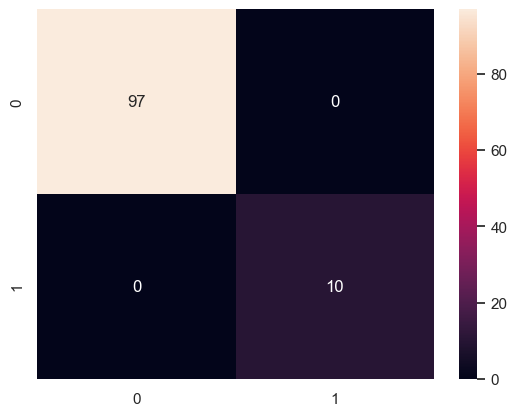

------TEST------
ACCURACY: 0.93
NEGATIVE RECALL (Y=0): 1.00
NEGATIVE PRECISION (Y=0): 0.92
POSITIVE RECALL (Y=1): 1.00
POSITIVE PRECISION (Y=1): 1.00
[[23  0]
 [ 2  2]]


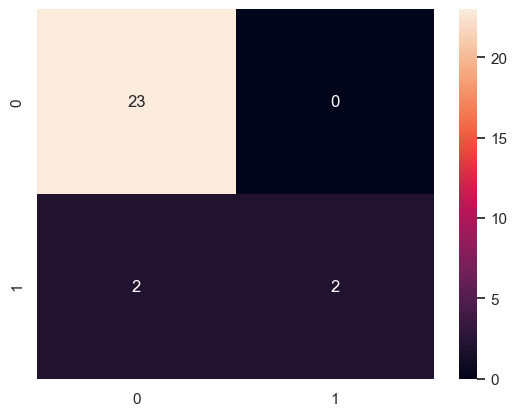

In [38]:
print("------TRAINING------")
confusion_plot(y_train,yp_train)
print("------TEST------")
confusion_plot(y_test,yp_test)


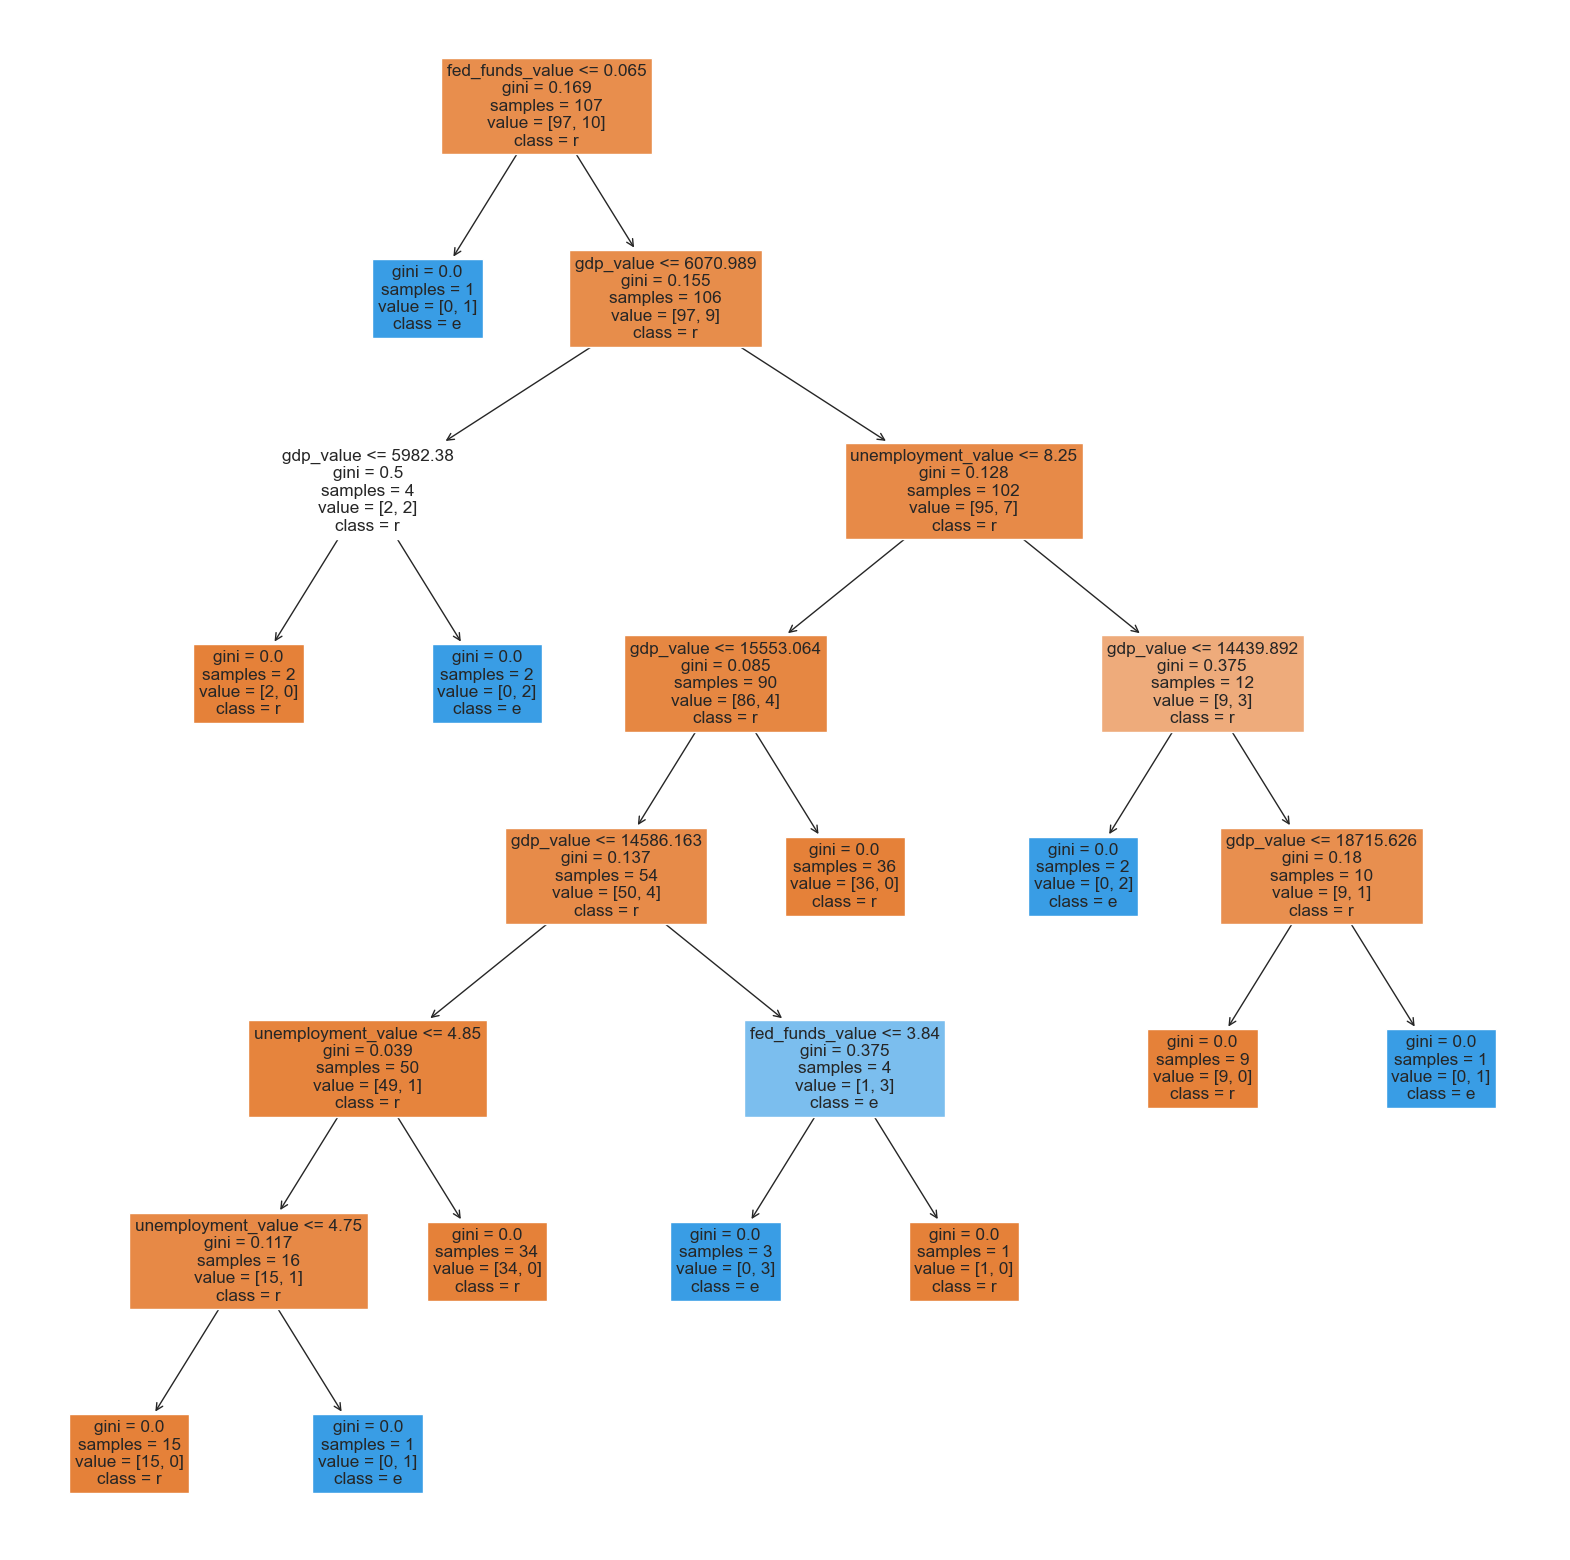

In [41]:
def plot_tree(model,X,Y):
    plt.figure(figsize = (20,20))
    tree.plot_tree(model, filled = True, feature_names=X.columns, class_names=Y.name)
    plt.show()

plot_tree(model, x_train, y_train)